In [19]:
import statsmodels.api as sm

In [20]:
import numpy as np

In [21]:
T = 100
n = 5

In [22]:
colvec = ['TSUS', 'd1', 'd2']

mean = [0, 0]

cov = [[1, 0], [0, 2]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 5000).T

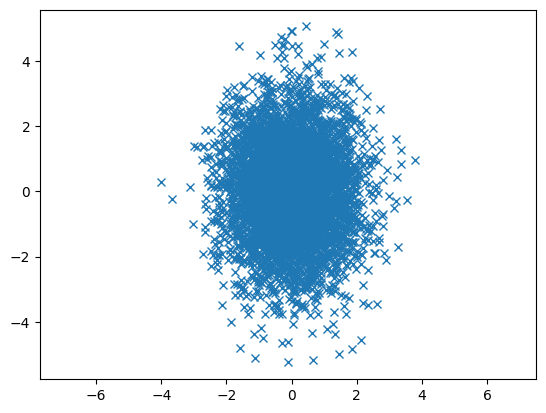

In [23]:
plt.plot(x, y, 'x')

plt.axis('equal')

plt.show()

In [24]:
df = pd.DataFrame(dict(a=np.random.normal(a_bar, a_sd, size=T),
                       b=np.random.normal(b_bar, b_sd, size=T),
                       c=np.random.normal(b_bar, b_sd, size=T)),
                  columns=colvec)

In [25]:
df

,TSUS,d1,d2


In [26]:
def LSTM_processor(list_of_series, shocktime_vec, shocklength_vec):

SyntaxError: incomplete input (3687437864.py, line 1)

In [27]:
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

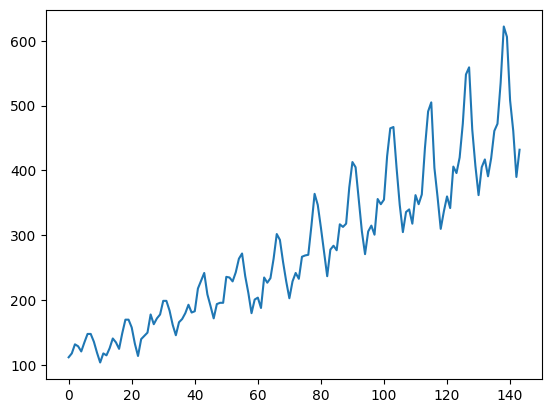

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [30]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [31]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [32]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [33]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [34]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [35]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [36]:
trainX.shape[0]

94

In [38]:
testX.shape[0]

46

In [39]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [40]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 0s - 3ms/step - loss: 0.0535
Epoch 2/100
94/94 - 0s - 260us/step - loss: 0.0277
Epoch 3/100
94/94 - 0s - 263us/step - loss: 0.0202
Epoch 4/100
94/94 - 0s - 267us/step - loss: 0.0182
Epoch 5/100
94/94 - 0s - 260us/step - loss: 0.0171
Epoch 6/100
94/94 - 0s - 265us/step - loss: 0.0162
Epoch 7/100
94/94 - 0s - 268us/step - loss: 0.0153
Epoch 8/100
94/94 - 0s - 262us/step - loss: 0.0144
Epoch 9/100
94/94 - 0s - 261us/step - loss: 0.0134
Epoch 10/100
94/94 - 0s - 261us/step - loss: 0.0125
Epoch 11/100
94/94 - 0s - 263us/step - loss: 0.0115
Epoch 12/100
94/94 - 0s - 257us/step - loss: 0.0104
Epoch 13/100
94/94 - 0s - 254us/step - loss: 0.0092
Epoch 14/100
94/94 - 0s - 257us/step - loss: 0.0080
Epoch 15/100
94/94 - 0s - 259us/step - loss: 0.0067
Epoch 16/100
94/94 - 0s - 262us/step - loss: 0.0055
Epoch 17/100
94/94 - 0s - 259us/step - loss: 0.0045
Epoch 18/100
94/94 - 0s - 264us/step - loss: 0.0036
Epoch 19/100
94/94 - 0s - 259us/step - loss: 0.0030
Epoch 20/100
94/94 - 0s - 257us/ste

In [41]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
Train Score: 22.90 RMSE
Test Score: 48.52 RMSE


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

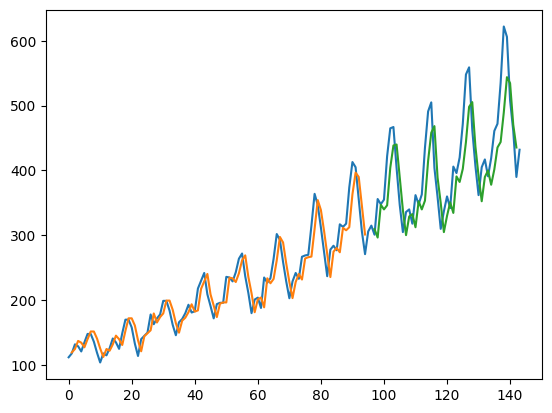

In [22]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()